<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/machine_learning_3_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 수집**
- 스마트폰 과의존 실태 조사 데이터 세트<br/>
: 2018년 유아에서 성인까지 *28,575명*데 대한 설문 조사 파일
- *179개의 속성*으로 구성된 csv 파일
- 설문자의 문항 번호, 변수명, 변수값 등 속성의 의미를 정리해 둔 **코드북** 파일
- 주요 속성
 - 대상별 변수(**DM1**): 1-유아, 2-청소년, 3-성인, 4-60대
 - 스마트폰 과의존 유형(**KK1**): 1-고위험, 2-잠재적 위험군, 3-일반 사용자군

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/머신러닝/기계학습/phone.xlsx')
df.head()

# DM1: 청소년
# KK1: 레이블
# Q3B_1,Q3B_2,Q3B_3,Q3B_4,Q3B_5,Q3B_6,Q3B_7,Q3B_8,Q3B_9,Q3B_10: 속성(1:전혀 그렇지 않다 2:그러히 않다 3:그렇다 4:매우 그렇다)

,DM1,KK1,Q3B_1,Q3B_2,Q3B_3,Q3B_4,Q3B_5,Q3B_6,Q3B_7,Q3B_8,Q3B_9,Q3B_10
0,2,2,2,3,3,3,2,2,2,3,3,2
1,2,3,2,2,1,2,2,3,2,2,2,2
2,2,3,1,1,1,1,1,1,1,2,2,2
3,2,3,2,3,3,2,2,1,2,2,2,2
4,2,3,1,1,1,1,1,1,1,4,1,1


# **속성 간 상관관계 분석**
- 10개의 설문 문항에서 3~4개 선택하여 간소화(Q3B_4
- 상관관계 분석하여 높은 4개 속성 선택

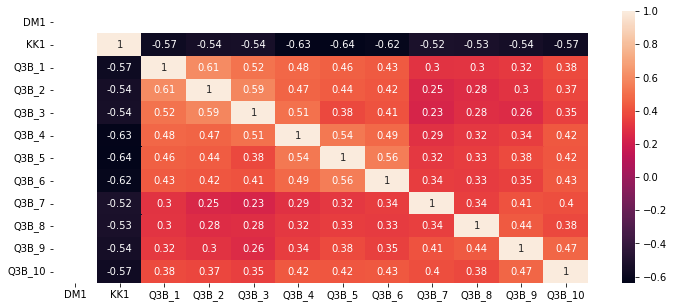

In [ ]:
df.corr()
import seaborn as sns
plt.figure(figsize=(12,5 ))
sns.heatmap(df.corr(),annot=True) # annotation: 히트맵 내부 수치

#### **Q3B_4: -0.63**
#### **Q3B_5: -0.64**
#### **Q3B_6: -0.62**
#### **Q3B_10: -0.57**

↑음수는 음의 상관관계

# **X,y 정의**
- X: 입력 데이터
- y: 레이블
- 대소문자 구문하는것이 관례

In [ ]:
X = df[['Q3B_4','Q3B_5','Q3B_6','Q3B_10']].to_numpy()
y = df['KK1'].to_numpy() # KK1 속성만
print(X.shape,y.shape) # X,y 형태 출력

(4886, 4) (4886,)


# **훈련 데이터/테스트 데이터 분리**
- 기본적으로 75% : 25% -> 3,664개와 1,222개로 분리

In [ ]:
# data split
from sklearn.model_selection import train_test_split

# 비율은 default(75:25), 결과값 비중 동일하게(stratify 매개변수)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
print(X_train.shape, y_train.shape)

(3664, 4) (3664,)


# **훈련 데이터로 학습**
- MLPClassifier 사용 (Multi Layer Perceptron)
- **은닉층** 100개 노드, 50개 노드, 25개 노드인 **딥러닝** 모델 생성
- 훈련 데이터로 학습

In [ ]:
# training
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,50,25),verbose=True)
model.fit(X_train, y_train)

Iteration 1, loss = 0.92794827
Iteration 2, loss = 0.73661451
Iteration 3, loss = 0.66610582
Iteration 4, loss = 0.59440716
Iteration 5, loss = 0.52294938
Iteration 6, loss = 0.45630868
Iteration 7, loss = 0.40286201
Iteration 8, loss = 0.37006220
Iteration 9, loss = 0.33831999
Iteration 10, loss = 0.31908043
Iteration 11, loss = 0.30625769
Iteration 12, loss = 0.29712992
Iteration 13, loss = 0.29361072
Iteration 14, loss = 0.28302145
Iteration 15, loss = 0.27882939
Iteration 16, loss = 0.27918334
Iteration 17, loss = 0.27098228
Iteration 18, loss = 0.27025307
Iteration 19, loss = 0.26697421
Iteration 20, loss = 0.26424615
Iteration 21, loss = 0.26651680
Iteration 22, loss = 0.26508587
Iteration 23, loss = 0.25906082
Iteration 24, loss = 0.26253992
Iteration 25, loss = 0.26503603
Iteration 26, loss = 0.25544625
Iteration 27, loss = 0.25293612
Iteration 28, loss = 0.25509064
Iteration 29, loss = 0.25216121
Iteration 30, loss = 0.25115572
Iteration 31, loss = 0.25297562
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 50, 25), verbose=True)

↑손실률(Loss)이 0.25171675에서 크게 바뀌지 않아 54회 학습 후 종료

# **테스트 데이터로 모델 평가**

In [ ]:
model.score(X_test,y_test)

0.9083469721767594

# **모델 활용**
1. 4개의 간소화된 스마트폰 과의존 설문 조사 후
2. 설문 결과를 학습 모델에 입력
3. 예측한 결과를 바탕으로 과의존 유형을 알려주자!

In [ ]:
question =['스마트폰이 옆에 있으면 다른 일에 집중하기 어렵다.',
            '스마트폰 생각이 머리에서 떠나지 않는다.',
            '스마트폰을 이용하고 싶은 충동을 강하게 느낀다.',
            '스마트폰 떄문에 학업 수행에 어려움이 있다.']

result = np.zeros(4)
print('다음 질문에 답해주세요. 1(전혀아니다),2(아니다),3(그렇다),4(매우 그렇다)')

for i, q in enumerate(question):
  result[i] = int(input((q)))
pred_result = model.predict([result])

if pred_result == 1:
  print("예상: 고위험군")
elif pred_result == 2:
  print("예상: 잠재적 위험군")
else:
  print("예상: 일반 사용자군")

다음 질문에 답해주세요. 1(전혀아니다),2(아니다),3(그렇다),4(매우 그렇다)
스마트폰이 옆에 있으면 다른 일에 집중하기 어렵다.2
스마트폰 생각이 머리에서 떠나지 않는다.1
스마트폰을 이용하고 싶은 충동을 강하게 느낀다.1
스마트폰 떄문에 학업 수행에 어려움이 있다.2
예상: 일반 사용자군
